import libaraies

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt

In [ ]:
# Make sure that you have the dependency installed on your system
# If not installed, install by running the following
!pip install kafka-python

In [ ]:
def model_Evaluate(model,X_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    #Print the evaluation metrics for the dataset.
    f1=f1_score(y_test, y_pred, average='weighted')
    print("the weighted f1_score:",f1)
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(model, X_test,y_test, values_format='d')
    plt.show()
    return f1

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


read the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/iot_static_data.csv') 

In [ ]:
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,18.885473,156.041505,202.780449,349.823034,1.602610e+05,-2.956340e+04,-0.370432,20.044037,154.488822,200.790831,...,30.034811,5.307252,1.298518e+02,4.880738,181.620841,227.548005,291.835506,59579.844560,17447.876,0.446623,4.927844,181.698241,227.581665,291.280119,59578.905890,17793.81865,0.455634,4.975746,181.767997,227.609424,290.719232,5.957503e+04,1.814181e+04,0.464725,4.997565,181.796886,227.619989,290.465036,5.957232e+04,1.829905e+04,0.468843,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,Provision PT 838 Security Camera,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.886530,169.313860,233.534964,295.273638,9.040787e+04,-2.457803e+03,-0.039193,62.898830,169.837418,233.073744,...,97.549007,1.686998,6.319929e+01,1.980432,69.960478,3.999805,101.835497,15.998438,0.000,0.000000,1.988213,69.976286,3.999930,101.846358,15.999438,0.00000,0.000000,1.996055,69.992095,3.999992,101.857221,1.599994e+01,0.000000e+00,0.000000,1.999605,69.999210,4.000000,101.862109,1.600000e+01,0.000000e+00,0.000000,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,Provision PT 737E Security Camera,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996402,449.036043,19.999968,449.036043,3.999987e+02,0.000000e+00,0.000000,1.997840,449.021626,19.999988,...,14.978833,10.667405,2.061570e+02,1.996402,449.036043,19.999968,449.036043,399.998701,0.000,0.000000,1.997840,449.021626,19.999988,449.021626,399.999532,0.00000,0.000000,1.999279,449.007209,19.999999,449.007209,3.999999e+02,0.000000e+00,0.000000,2.428558,450.295009,20.081460,450.295009,4.032651e+02,0.000000e+00,0.000000,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,Samsung SNH 1011 N Webcam,BENIGN
3,1.000000,60.000018,0.004849,1.000065,60.017569,4.743299,1.063813,76.195918,4110.590208,2.936

In [ ]:
df.shape

(25609, 117)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
df['Source']= label_encoder.fit_transform(df['Source'])

In [ ]:
df.head(5)

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,MI_dir_L0.1_mean,MI_dir_L0.1_variance,MI_dir_L0.01_weight,MI_dir_L0.01_mean,MI_dir_L0.01_variance,H_L5_weight,H_L5_mean,H_L5_variance,H_L3_weight,H_L3_mean,H_L3_variance,H_L1_weight,H_L1_mean,H_L1_variance,H_L0.1_weight,H_L0.1_mean,H_L0.1_variance,H_L0.01_weight,H_L0.01_mean,H_L0.01_variance,HH_L5_weight,HH_L5_mean,HH_L5_std,HH_L5_magnitude,HH_L5_radius,HH_L5_covariance,HH_L5_pcc,HH_L3_weight,HH_L3_mean,HH_L3_std,...,HH_jit_L0.01_weight,HH_jit_L0.01_mean,HH_jit_L0.01_variance,HpHp_L5_weight,HpHp_L5_mean,HpHp_L5_std,HpHp_L5_magnitude,HpHp_L5_radius,HpHp_L5_covariance,HpHp_L5_pcc,HpHp_L3_weight,HpHp_L3_mean,HpHp_L3_std,HpHp_L3_magnitude,HpHp_L3_radius,HpHp_L3_covariance,HpHp_L3_pcc,HpHp_L1_weight,HpHp_L1_mean,HpHp_L1_std,HpHp_L1_magnitude,HpHp_L1_radius,HpHp_L1_covariance,HpHp_L1_pcc,HpHp_L0.1_weight,HpHp_L0.1_mean,HpHp_L0.1_std,HpHp_L0.1_magnitude,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,Source,Class
0,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,19.570634,152.679121,39991.937640,20.937891,150.455024,38960.674060,23.168006,145.454142,36954.215040,33.115077,123.515434,27655.538890,62.619034,102.471926,15409.868150,18.885473,156.041505,202.780449,349.823034,1.602610e+05,-2.956340e+04,-0.370432,20.044037,154.488822,200.790831,...,30.034811,5.307252,1.298518e+02,4.880738,181.620841,227.548005,291.835506,59579.844560,17447.876,0.446623,4.927844,181.698241,227.581665,291.280119,59578.905890,17793.81865,0.455634,4.975746,181.767997,227.609424,290.719232,5.957503e+04,1.814181e+04,0.464725,4.997565,181.796886,227.619989,290.465036,5.957232e+04,1.829905e+04,0.468843,4.999756,181.799689,2.276210e+02,290.439555,5.957202e+04,1.831480e+04,4.692557e-01,5,BENIGN
1,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.893840,169.297843,54532.338720,62.957476,169.735104,54283.995040,82.340884,168.919514,53449.819730,98.214224,164.300338,51038.672810,124.460107,146.697496,42083.223280,49.886530,169.313860,233.534964,295.273638,9.040787e+04,-2.457803e+03,-0.039193,62.898830,169.837418,233.073744,...,97.549007,1.686998,6.319929e+01,1.980432,69.960478,3.999805,101.835497,15.998438,0.000,0.000000,1.988213,69.976286,3.999930,101.846358,15.999438,0.00000,0.000000,1.996055,69.992095,3.999992,101.857221,1.599994e+01,0.000000e+00,0.000000,1.999605,69.999210,4.000000,101.862109,1.600000e+01,0.000000e+00,0.000000,1.999960,69.999921,4.000000e+00,101.862598,1.600000e+01,0.000000e+00,0.000000e+00,4,BENIGN
2,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996527,449.011775,409.365474,2.002395,448.141152,739.076602,2.166552,419.128740,11039.485060,4.621621,278.780846,34237.687910,29.401508,286.241737,32040.668620,1.996402,449.036043,19.999968,449.036043,3.999987e+02,0.000000e+00,0.000000,1.997840,449.021626,19.999988,...,14.978833,10.667405,2.061570e+02,1.996402,449.036043,19.999968,449.036043,399.998701,0.000,0.000000,1.997840,449.021626,19.999988,449.021626,399.999532,0.00000,0.000000,1.999279,449.007209,19.999999,449.007209,3.999999e+02,0.000000e+00,0.000000,2.428558,450.295009,20.081460,450.295009,4.032651e+02,0.000000e+00,0.000000,14.978833,455.354366,1.959295e+01,455.354366,3.838837e+02,0.000000e+00,0.000000e+00,6,BENIGN
3,1.000000,60.000018,0.004849,1.000065,60.017569,4.743299,1.063813,76.195918,4110.590208,2.936177,218.185372,17685.800370,24.603310,201.078998,16329.248820,1.000000,60.000018,0.0048

**split the data**

In [ ]:
X=df.drop(['Class'],axis=1)
y=df['Class']

**Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109,stratify=y)

**build the firest model** 

99.98047637641547
the weighted f1_score: 0.9997914647963392
                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4458
  gafgyt_combo_attack       1.00      0.75      0.86         4
   gafgyt_junk_attack       0.99      1.00      0.99        75
   gafgyt_scan_attack       1.00      1.00      1.00        40
    gafgyt_tcp_attack       1.00      1.00      1.00        43
    gafgyt_udp_attack       1.00      1.00      1.00        89
     mirai_ack_attack       1.00      1.00      1.00        19
    mirai_scan_attack       1.00      1.00      1.00        17
     mirai_syn_attack       1.00      1.00      1.00        20
     mirai_udp_attack       1.00      1.00      1.00       355
mirai_udpplain_attack       1.00      1.00      1.00         2

             accuracy                           1.00      5122
            macro avg       1.00      0.98      0.99      5122
         weighted avg       1.00      1.00      1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


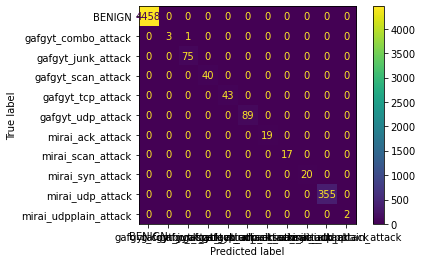

0.9997914647963392

In [ ]:
classifier_rf = RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=10)
classifier_rf.fit(X_train, y_train)

y_predict = classifier_rf.predict(X_test)
print(accuracy_score(y_predict, y_test) * 100)
model_Evaluate(classifier_rf,X_test)

99.98047637641547
the weighted f1_score: 0.9997914647963392
                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4458
  gafgyt_combo_attack       1.00      0.75      0.86         4
   gafgyt_junk_attack       0.99      1.00      0.99        75
   gafgyt_scan_attack       1.00      1.00      1.00        40
    gafgyt_tcp_attack       1.00      1.00      1.00        43
    gafgyt_udp_attack       1.00      1.00      1.00        89
     mirai_ack_attack       1.00      1.00      1.00        19
    mirai_scan_attack       1.00      1.00      1.00        17
     mirai_syn_attack       1.00      1.00      1.00        20
     mirai_udp_attack       1.00      1.00      1.00       355
mirai_udpplain_attack       1.00      1.00      1.00         2

             accuracy                           1.00      5122
            macro avg       1.00      0.98      0.99      5122
         weighted avg       1.00      1.00      1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


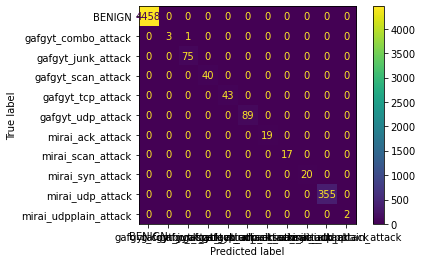

0.9997914647963392

In [ ]:
classifier_rf2 = RandomForestClassifier(random_state=109, n_jobs=-1, n_estimators=10)
classifier_rf2.fit(X_train, y_train)

y_predict = classifier_rf2.predict(X_test)
print(accuracy_score(y_predict, y_test) * 100)
model_Evaluate(classifier_rf,X_test)

**the second model**

the weighted f1_score: 0.9995470176808675
                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4458
  gafgyt_combo_attack       1.00      0.50      0.67         4
   gafgyt_junk_attack       0.97      1.00      0.99        75
   gafgyt_scan_attack       1.00      1.00      1.00        40
    gafgyt_tcp_attack       1.00      1.00      1.00        43
    gafgyt_udp_attack       1.00      1.00      1.00        89
     mirai_ack_attack       1.00      1.00      1.00        19
    mirai_scan_attack       1.00      1.00      1.00        17
     mirai_syn_attack       1.00      1.00      1.00        20
     mirai_udp_attack       1.00      1.00      1.00       355
mirai_udpplain_attack       1.00      1.00      1.00         2

             accuracy                           1.00      5122
            macro avg       1.00      0.95      0.97      5122
         weighted avg       1.00      1.00      1.00      5122



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


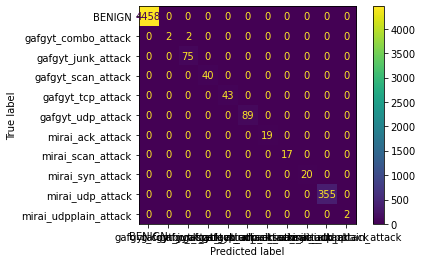

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
f1=model_Evaluate(model,X_test)

**Train the models on all the data**

In [ ]:
classifier_rf.fit(X, y)
classifier_rf2.fit(X, y)
model.fit(X, y)

XGBClassifier(objective='multi:softprob')

**Streaming**

In [ ]:
import time

# Import the python Consumer Client for Kafka
from kafka import KafkaConsumer
df_test=df

#list for f1_score 
f_dynamic=[]
f_staticmodel=[]
#list for recall
recall_dynamic=[]
recall_staticmodel=[]
#list for percision
precision_dynamic=[]
precision_staticmodel=[]
precision_xgb=[]
recall_xgb=[]
f_xgb=[]
# instantiate the KafkaConsumer Class using the arguments mentioned.
# do not change any arguments other than the first positional argument.
consumer = KafkaConsumer(
    'task2',   # change this to "task2" for the IOT Botnet Detection  ---- important ----
    bootstrap_servers="34.130.121.39:9092",
    sasl_plain_username="student",
    sasl_plain_password="uottawa",
    security_protocol="SASL_PLAINTEXT",
    sasl_mechanism="PLAIN",
    auto_offset_reset='earliest',
    enable_auto_commit=False
)
for j in range(0,100000,5000):
    packets=pd.DataFrame()
    # Data Stream flowing in.
    i = j
    for message in consumer:   
        data_packet = message.value
        x=eval(data_packet)
        packets=packets.append(x,ignore_index=True)
        
        
        if i == 4999+j:
            print("the number of packets is :  ",packets.shape[0])
            packets['Source']= label_encoder.transform(packets['Source'])
            packets = packets.reindex(columns=df_test.columns)
            
            
            X_packets=packets.drop(['Class'],axis=1)
            y_packets=packets['Class']

            
            y_pred = classifier_rf.predict(X_packets)
            y_pred2 = classifier_rf2.predict(X_packets)
            y_predxgb = model.predict(X_packets)

            #Print the evaluation metrics for the dataset.
            f1_dynamic=f1_score(y_packets, y_pred, average='weighted')
            f1_static=f1_score(y_packets, y_pred2, average='weighted')
            f1_xgb=f1_score(y_packets, y_predxgb, average='weighted')

            recall_dynamic.append(recall_score(y_packets ,y_pred, average='weighted'))
            recall_staticmodel.append(recall_score(y_packets, y_pred2, average='weighted'))
            recall_xgb.append(recall_score(y_packets, y_predxgb, average='weighted'))
            
            precision_dynamic.append(precision_score(y_packets ,y_pred, average='weighted'))
            precision_staticmodel.append(precision_score(y_packets, y_pred2, average='weighted'))
            precision_xgb.append(precision_score(y_packets, y_predxgb, average='weighted'))

            print("the weighted f1_score for static  model:",f1_static)
            f_staticmodel.append(f1_static)
            print("trained on ")
            print(y.value_counts())

            print("the classification report for static model:")
            print(classification_report(y_packets, y_pred2))

            print("the weighted f1_score for pretraindmodel RF:",f1_dynamic)
            f_dynamic.append(f1_dynamic)
            print("the weighted f1_score for pretraindmodel xgb:",f1_xgb)
            f_xgb.append(f1_xgb)
            print("the classification report for pretraind RF model:")
            print(classification_report(y_packets, y_pred))
            print("the classification report for pretraind XGB model:")
            print(classification_report(y_packets, y_predxgb))
        

            #drop the first 5000 rows from te data
            df_test.drop(df_test.index[0:packets.shape[0]], inplace=True)
            #add the new packets
            df_test=df_test.append(packets,ignore_index=True)
            

            Xnew=df_test.drop(['Class'],axis=1)
            ynew=df_test['Class']

            classifier_rf.fit(Xnew, ynew)
            print("pretrained done on ")
            print(ynew.value_counts())
            print("############################################################################################")



            ##############################################
            break
            
        i += 1 

the number of packets is :   5000


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr

the weighted f1_score for static  model: 0.9987998376960677
trained on 
BENIGN                   22287
mirai_udp_attack          1774
gafgyt_udp_attack          446
gafgyt_junk_attack         377
gafgyt_tcp_attack          213
gafgyt_scan_attack         200
mirai_syn_attack           101
mirai_ack_attack            96
mirai_scan_attack           86
gafgyt_combo_attack         18
mirai_udpplain_attack       11
Name: Class, dtype: int64
the classification report for static model:
                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4360
  gafgyt_combo_attack       0.00      0.00      0.00         2
   gafgyt_junk_attack       0.98      0.99      0.98        84
   gafgyt_scan_attack       1.00      0.97      0.99        37
    gafgyt_tcp_attack       1.00      0.98      0.99        41
    gafgyt_udp_attack       0.99      1.00      0.99        80
     mirai_ack_attack       1.00      1.00      1.00        15
    mirai_sc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4360
  gafgyt_combo_attack       0.00      0.00      0.00         2
   gafgyt_junk_attack       0.98      0.99      0.98        84
   gafgyt_scan_attack       1.00      0.97      0.99        37
    gafgyt_tcp_attack       1.00      0.98      0.99        41
    gafgyt_udp_attack       0.99      1.00      0.99        80
     mirai_ack_attack       1.00      1.00      1.00        15
    mirai_scan_attack       1.00      1.00      1.00        17
     mirai_syn_attack       1.00      1.00      1.00        22
     mirai_udp_attack       1.00      1.00      1.00       338
mirai_udpplain_attack       1.00      1.00      1.00         4

             accuracy                           1.00      5000
            macro avg       0.91      0.90      0.90      5000
         weighted avg       1.00      1.00      1.00      5000

the classification report for pretraind XGB model:
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetr

the weighted f1_score for static  model: 0.9995011129314239
trained on 
BENIGN                   22287
mirai_udp_attack          1774
gafgyt_udp_attack          446
gafgyt_junk_attack         377
gafgyt_tcp_attack          213
gafgyt_scan_attack         200
mirai_syn_attack           101
mirai_ack_attack            96
mirai_scan_attack           86
gafgyt_combo_attack         18
mirai_udpplain_attack       11
Name: Class, dtype: int64
the classification report for static model:
                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4329
  gafgyt_combo_attack       0.00      0.00      0.00         1
   gafgyt_junk_attack       0.99      1.00      0.99        91
   gafgyt_scan_attack       1.00      1.00      1.00        30
    gafgyt_tcp_attack       1.00      1.00      1.00        38
    gafgyt_udp_attack       0.99      1.00      0.99        86
     mirai_ack_attack       1.00      1.00      1.00        15
    mirai_sc

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

                       precision    recall  f1-score   support

               BENIGN       1.00      1.00      1.00      4329
  gafgyt_combo_attack       0.00      0.00      0.00         1
   gafgyt_junk_attack       0.99      1.00      0.99        91
   gafgyt_scan_attack       1.00      1.00      1.00        30
    gafgyt_tcp_attack       1.00      1.00      1.00        38
    gafgyt_udp_attack       0.99      1.00      0.99        86
     mirai_ack_attack       1.00      1.00      1.00        15
    mirai_scan_attack       1.00      1.00      1.00        16
     mirai_syn_attack       1.00      1.00      1.00        21
     mirai_udp_attack       1.00      1.00      1.00       370
mirai_udpplain_attack       1.00      1.00      1.00         3

             accuracy                           1.00      5000
            macro avg       0.91      0.91      0.91      5000
         weighted avg       1.00      1.00      1.00      5000

the classification report for pretraind XGB model:
 

In [ ]:
print(len(f_dynamic))

20


In [ ]:
print(len(f_xgb))

20


In [ ]:
def compaire(dynamic,staticmodel,label):
  # line 1 points
  x1 = [i for i in range(len(dynamic))]
  y1 = dynamic
  # plotting the line 1 points 
  plt.plot(x1, y1, label = "pretrained")
  # line 2 points
  x2 = x1
  y2 = staticmodel
  # plotting the line 2 points 
  plt.plot(x2, y2, label = "static")
  plt.xlabel('number of packets')
  # Set the y axis label of the current axis.
  plt.ylabel(label)
  # Set a title of the current axes.
  plt.title('fixed model vs pretrained model ')
  # show a legend on the plot
  plt.legend()
  # Display a figure.
  plt.show()

In [ ]:
def compairemodels(rf,xgb,label):
  # line 1 points
  x1 = [i for i in range(len(rf))]
  y1 = rf
  # plotting the line 1 points 
  plt.plot(x1, y1, label = "rf")
  # line 2 points
  x2 = x1
  y2 = xgb
  # plotting the line 2 points 
  plt.plot(x2, y2, label = "xgb")
  plt.xlabel('number of packets')
  # Set the y axis label of the current axis.
  plt.ylabel(label)
  # Set a title of the current axes.
  plt.title('fixed model vs pretrained model ')
  # show a legend on the plot
  plt.legend()
  # Display a figure.
  plt.show()

**XGB**

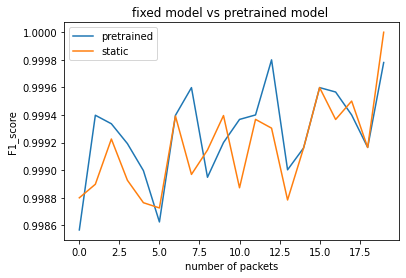

In [ ]:
compaire(f_xgb,f_staticmodel,"F1_score")

In [ ]:
winner=[]
for i in range(len(f_dynamic)):
    if f_dynamic[i] > f_staticmodel[i]:
      winner.append("dynamic")
    else :   
      winner.append("static")

In [ ]:
winner=[]
for i in range(len(f_dynamic)):
  if f_xgb[i]>f_staticmodel[i]:
     winner.append("dynamic")
  else :   
     winner.append("static")

In [ ]:
final=pd.DataFrame({"static":f_staticmodel,"dynamic":f_xgb,"winner":winner})

In [ ]:
final['winner'].value_counts()

dynamic    12
static      8
Name: winner, dtype: int64

In [ ]:
np.mean(final['static'])

0.9991685243104008

In [ ]:
np.mean(final['dynamic'])

0.99927537669925

**RF**

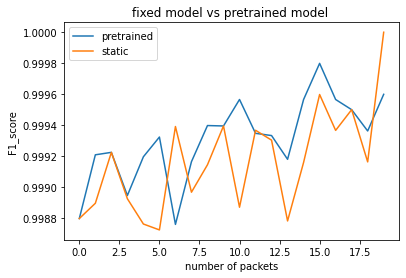

In [ ]:
compaire(f_dynamic,f_staticmodel,"F1_score")

In [ ]:
winner=[]
for i in range(len(f_dynamic)):
  if f_dynamic[i]>f_staticmodel[i]:
     winner.append("dynamic")
  else :   
     winner.append("static")

In [ ]:
final=pd.DataFrame({"static":f_staticmodel,"dynamic":f_dynamic,"winner":winner})

In [ ]:
final['winner'].value_counts()

dynamic    13
static      7
Name: winner, dtype: int64

In [ ]:
np.mean(final['static'])

0.9991685243104008

In [ ]:
np.mean(final['dynamic'])

0.9993129671506343

In [ ]:
def compairemodels(rf,xgb,label):
  # line 1 points
  x1 = [i for i in range(len(rf))]
  y1 = rf
  # plotting the line 1 points 
  plt.plot(x1, y1, label = "rf")
  # line 2 points
  x2 = x1
  y2 = xgb
  # plotting the line 2 points 
  plt.plot(x2, y2, label = "xgb")
  plt.xlabel('number of packets')
  # Set the y axis label of the current axis.
  plt.ylabel(label)
  # Set a title of the current axes.
  plt.title('fixed model vs pretrained model ')
  # show a legend on the plot
  plt.legend()
  # Display a figure.
  plt.show()

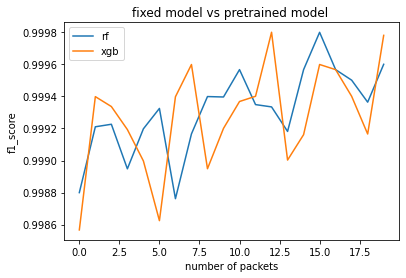

In [ ]:
compairemodels(f_dynamic,f_xgb,"f1_score")

In [ ]:
winner=[]
for i in range(len(f_dynamic)):
  if f_dynamic[i]>f_xgb[i]:
     winner.append("dynamic_rf")
  else :   
     winner.append("dynamic_xgb")

In [ ]:
final=pd.DataFrame({"f_xgb":f_xgb,"dynamic":f_dynamic,"winner":winner})

In [ ]:
final['winner'].value_counts()

dynamic_rf     11
dynamic_xgb     9
Name: winner, dtype: int64

In [ ]:
np.mean(final['f_xgb'])

0.99927537669925

In [ ]:
np.mean(final['dynamic'])

0.9993129671506343

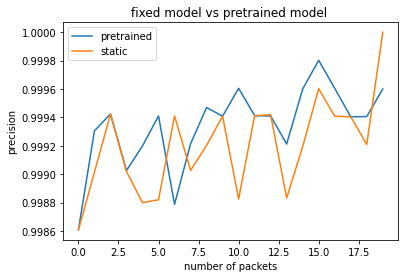

In [ ]:
compaire(precision_dynamic,precision_staticmodel,"precision")

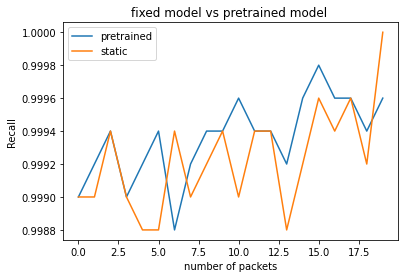

In [ ]:

compaire(recall_dynamic,recall_staticmodel,"Recall")

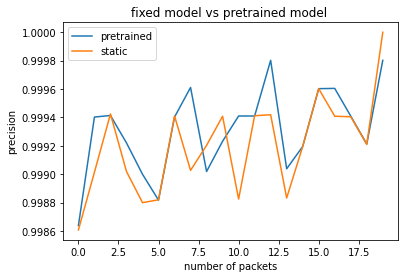

In [ ]:
compaire(precision_xgb,precision_staticmodel,"precision")

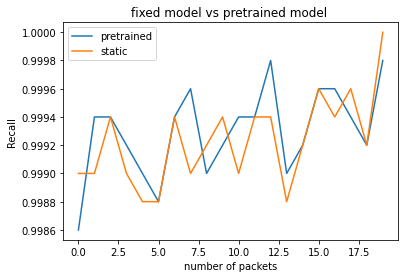

In [ ]:
compaire(recall_xgb,recall_staticmodel,"Recall")

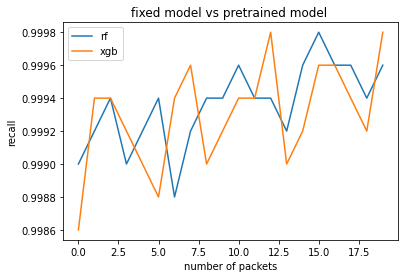

In [ ]:
compairemodels(recall_dynamic,recall_xgb,"recall")

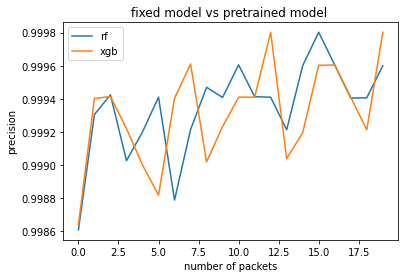

In [ ]:
compairemodels(precision_dynamic,precision_xgb,"precision")